<a id='intro'></a>
## Introduction
### Dataset Description
This dataset contains information of more than 10,000 movies from The Movie Database (TMDb), including user ratings, budget and revenue.

Columns 'cast', 'genres' or 'director' contain multiple values separated by "|" characters. 
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Questions for Analysis:

1. Are directors who made the most movies also have the highest revenue in total? And are they top rated directors?
2. The trend of movies genres through the years? Show by number of movies/budget/revenue of each genre throught time, and any similarity among those trends?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import seaborn as sns
import operator
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Reading the data:

In [2]:
#import dataset
df = pd.read_csv('tmdb-movies.csv')

Dataset info:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Inspect 10 first row of the dataset

In [4]:
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

Print dataset columns:

In [5]:
print(list(df.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']



### Data Cleaning


Drop Unecessary columns for analytics [id, imdb_id, homepage, tagline, keywords, overview, runtime, production_companies]

In [6]:
##Drop Unecessary columns for analytics [id, imdb_id, homepage, tagline, keywords, overview, runtime, production_companies]
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'runtime','production_companies'], axis=1, inplace=True)

In [7]:
#Inspect the 5 first rows of dataset:
df.head()

,popularity,budget,revenue,original_title,cast,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Cleaned dataframe info:

In [8]:
#Detailed info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   cast            10790 non-null  object 
 5   director        10822 non-null  object 
 6   genres          10843 non-null  object 
 7   release_date    10866 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
 11  budget_adj      10866 non-null  float64
 12  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.1+ MB


Checking for Null value in the dataframe:

In [9]:
df.isna().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Explore movies based on directors)
Finding directors who made the most movies, revenue in total and received the highest vote average score. 

<b>1. 20 directors with the most movies made:</b>

Drop the rows with Null in 'cast', 'director' and 'gernes' into the "df_director" dataset

In [10]:
#Drop the rows with Null:
df_director = df.dropna(axis=0)

In [11]:
#Recheck the dataset info:
df_director.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10732 non-null  float64
 1   budget          10732 non-null  int64  
 2   revenue         10732 non-null  int64  
 3   original_title  10732 non-null  object 
 4   cast            10732 non-null  object 
 5   director        10732 non-null  object 
 6   genres          10732 non-null  object 
 7   release_date    10732 non-null  object 
 8   vote_count      10732 non-null  int64  
 9   vote_average    10732 non-null  float64
 10  release_year    10732 non-null  int64  
 11  budget_adj      10732 non-null  float64
 12  revenue_adj     10732 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.1+ MB


Split the movies with multiple directors into multiples rows of the dataframe with those directors:

In [12]:
df_director_new = df_director.assign(director=df['director'].str.split('\|')).explode('director')

In [13]:
df_director_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11775 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      11775 non-null  float64
 1   budget          11775 non-null  int64  
 2   revenue         11775 non-null  int64  
 3   original_title  11775 non-null  object 
 4   cast            11775 non-null  object 
 5   director        11775 non-null  object 
 6   genres          11775 non-null  object 
 7   release_date    11775 non-null  object 
 8   vote_count      11775 non-null  int64  
 9   vote_average    11775 non-null  float64
 10  release_year    11775 non-null  int64  
 11  budget_adj      11775 non-null  float64
 12  revenue_adj     11775 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.3+ MB


The list of 20 directors made the most movies:

In [14]:
# top 20 directors with the most movies:
top_20_directors = df_director_new['director'].value_counts().head(20)
print(f'Top 20 Director with the most movies:\n\n{top_20_directors}')

Top 20 Director with the most movies:

Woody Allen             46
Clint Eastwood          34
Martin Scorsese         30
Steven Spielberg        30
Steven Soderbergh       23
Ridley Scott            23
Ron Howard              22
Joel Schumacher         21
Brian De Palma          20
Tim Burton              19
Robert Rodriguez        19
John Carpenter          19
Wes Craven              19
Barry Levinson          19
Francis Ford Coppola    19
David Cronenberg        19
Rob Reiner              18
Mike Nichols            18
Walter Hill             18
John Landis             18
Name: director, dtype: int64


Visualization of 20 directors with the most movies made:

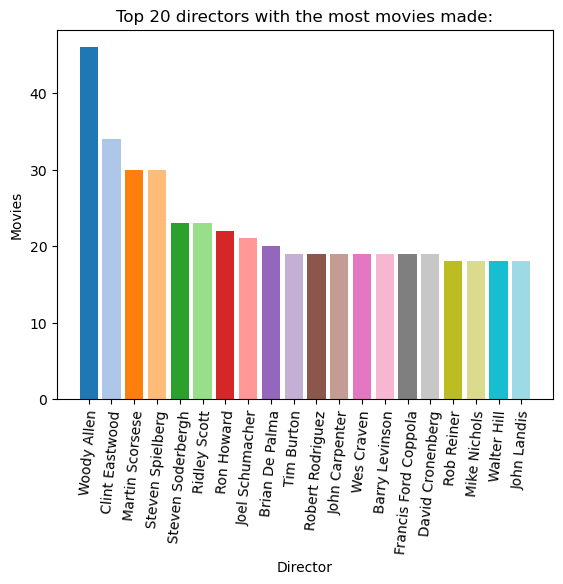

In [15]:
#Visualize the top 25 directors with the most movies:
plt.bar(top_20_directors.index, top_20_directors.values,color=plt.cm.tab20(range(len(top_20_directors))))
 
#add labels and title
plt.xlabel('Director');
plt.ylabel('Movies');
plt.title('Top 20 directors with the most movies made:');
# rotate the x-axis labels by 85 degrees
plt.xticks(rotation=85);
plt.show();

Woody Allen, Clint Eastwood, Martin Scorsese, Steven Spielberg, Steven Soderbergh/Ridley Scott are 5 directors made the most movies in the period of 1960-2015

<b>2. 20 directors with the highest total revenue (associated movie in terms of 2010 dollars, accounting for inflation over time):</b>

Group the dataset of 20 directors with highest revenue by 'director' columns with their 'revenue_adj' column:

In [16]:
revenue_directors_20 = df_director_new.groupby('director')['revenue_adj'].sum().nlargest(20)

The list of 20 director with highest revenue of all time:

In [17]:
print(revenue_directors_20)

director
Steven Spielberg       1.526692e+10
James Cameron          7.327221e+09
Peter Jackson          7.019848e+09
George Lucas           6.313919e+09
Robert Zemeckis        5.655648e+09
Michael Bay            5.460672e+09
Chris Columbus         5.094077e+09
Tim Burton             4.660141e+09
Ron Howard             4.527095e+09
Ridley Scott           4.219566e+09
David Yates            4.177455e+09
Christopher Nolan      4.164262e+09
Roland Emmerich        4.076981e+09
Gore Verbinski         3.926130e+09
Clint Eastwood         3.659689e+09
Wolfgang Reitherman    3.646712e+09
Sam Raimi              3.595782e+09
Lee Unkrich            3.416071e+09
J.J. Abrams            3.414677e+09
Richard Donner         3.354120e+09
Name: revenue_adj, dtype: float64


<b>Visualize the 20 directors with the highest gross:</b>

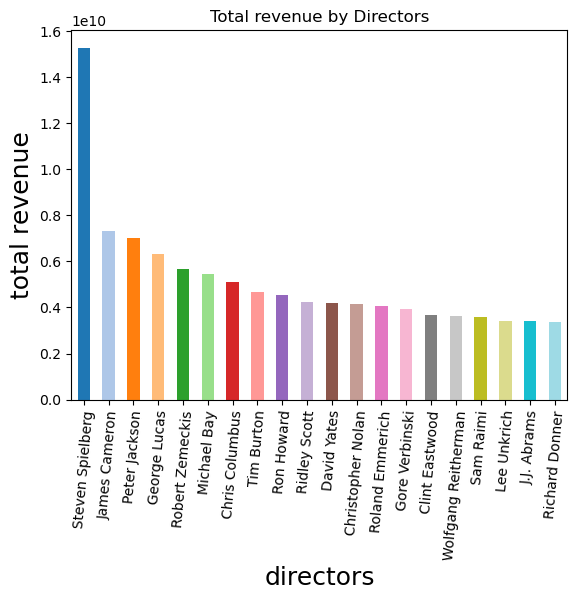

In [18]:
#Visualize the 20 directors with the highest gross:
revenue_directors_20.plot(kind='bar', title='Total revenue by Directors',color=plt.cm.tab20(range(len(top_20_directors))));
plt.xlabel('directors', fontsize=18);
plt.ylabel('total revenue', fontsize=18);
plt.xticks(rotation=85);
plt.show();


Steven Spielberg, James Cameron, Peter Jackson, George Lucas, Robert Zemeckis and Michael Bay are 5 directors hold the highest revenue of all time.

<b>3. Directors with the highest average score:</b>

Group the dataset of 20 directors with highest average vote by 'director' columns with their 'vote_average' column:

In [19]:
avg_score_directors_20 = df_director_new.groupby('director')['vote_average'].mean().nlargest(20)

List the 20 directors have highest average voting score:

In [20]:
print(avg_score_directors_20)

director
Mark Cousins              9.200000
David Mallet              8.700000
Curt Morgan               8.500000
Michael Henry Wilson      8.500000
Saul Swimmer              8.500000
Anthony Mandler           8.400000
Chris Hegedus             8.400000
David Dawkins             8.400000
Jorge RamÃ­rez SuÃ¡rez    8.400000
Andy Saunders             8.300000
Claude Lanzmann           8.300000
Dean Wellins              8.300000
Jeff Feuerzeig            8.300000
Scot McFadyen             8.233333
Al Reinert                8.200000
Damien Chazelle           8.200000
Ã‡aÄŸan Irmak             8.200000
Chris Bould               8.100000
Frank Pavich              8.100000
Richard Press             8.100000
Name: vote_average, dtype: float64


Visualize 20 directors have the highest average vote score on the scale of 10:

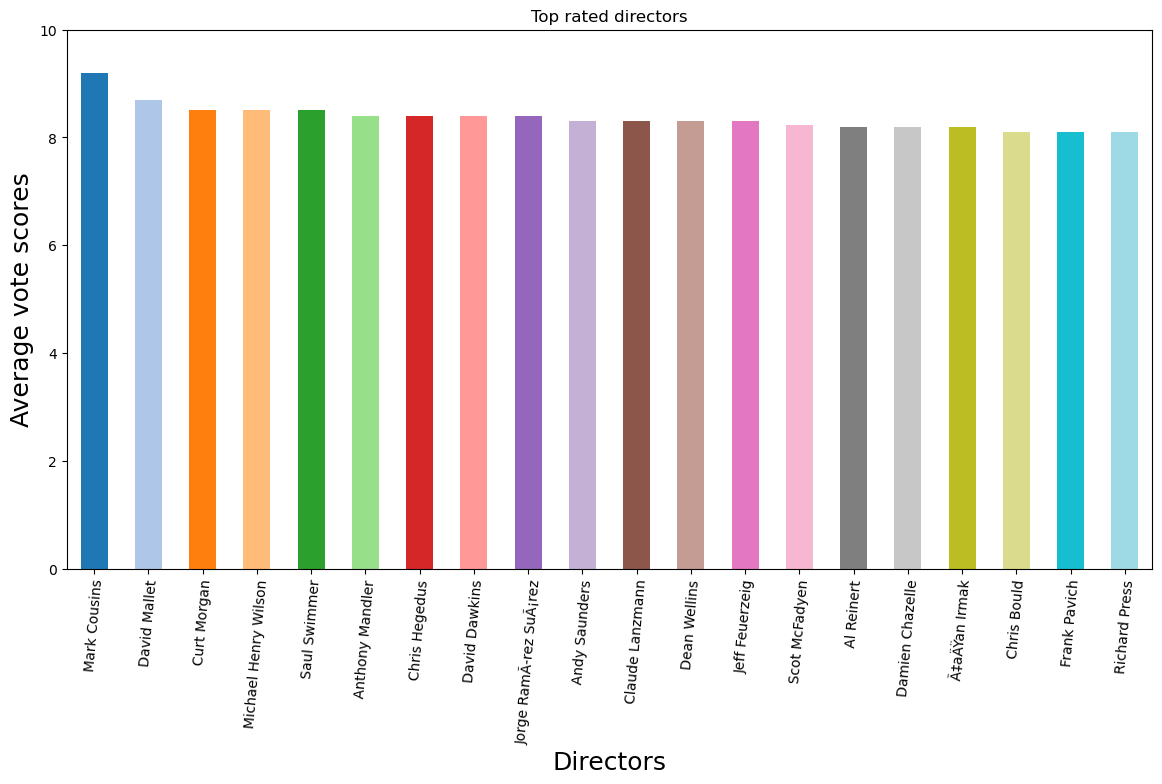

In [21]:
#Visualize the 20 directors with the highest avergage vote on the scale of 10:
avg_score_directors_20.plot(kind='bar', title='Top rated directors', figsize=(14,7),color=plt.cm.tab20(range(len(top_20_directors))));
plt.xlabel('Directors', fontsize=18);
plt.ylabel('Average vote scores', fontsize=18);
plt.ylim(0,10);
plt.xticks(rotation=85);
plt.show();

### Research Question 2 : Explore the movie gernes over the years:

Investigate the movies based on their gernes to find insights.


Dropping the movies that don't have genres:

In [22]:
df_genres = df.dropna(subset=['genres'],axis=0)

Dataframe info:

In [23]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10843 non-null  float64
 1   budget          10843 non-null  int64  
 2   revenue         10843 non-null  int64  
 3   original_title  10843 non-null  object 
 4   cast            10768 non-null  object 
 5   director        10801 non-null  object 
 6   genres          10843 non-null  object 
 7   release_date    10843 non-null  object 
 8   vote_count      10843 non-null  int64  
 9   vote_average    10843 non-null  float64
 10  release_year    10843 non-null  int64  
 11  budget_adj      10843 non-null  float64
 12  revenue_adj     10843 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.2+ MB


Split the movies with multiple gernes into multiples rows of the dataframe:

In [24]:
df_genres_new = df_genres.assign(genres=df['genres'].str.split('\|')).explode('genres')

<b>1. Total number of movies by genres</b>

In [25]:
#recheck the dataframe info:
df_genres_new.head(10)

,popularity,budget,revenue,original_title,cast,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Adventure,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Science Fiction,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Science Fiction,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Print the total movies are made based on their genres:

In [26]:
total_genres_new = df_genres_new['genres'].value_counts()
print(f'Total genres:\n\n{total_genres_new}')

Total genres:

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64


Visualize the number of movies by genres:


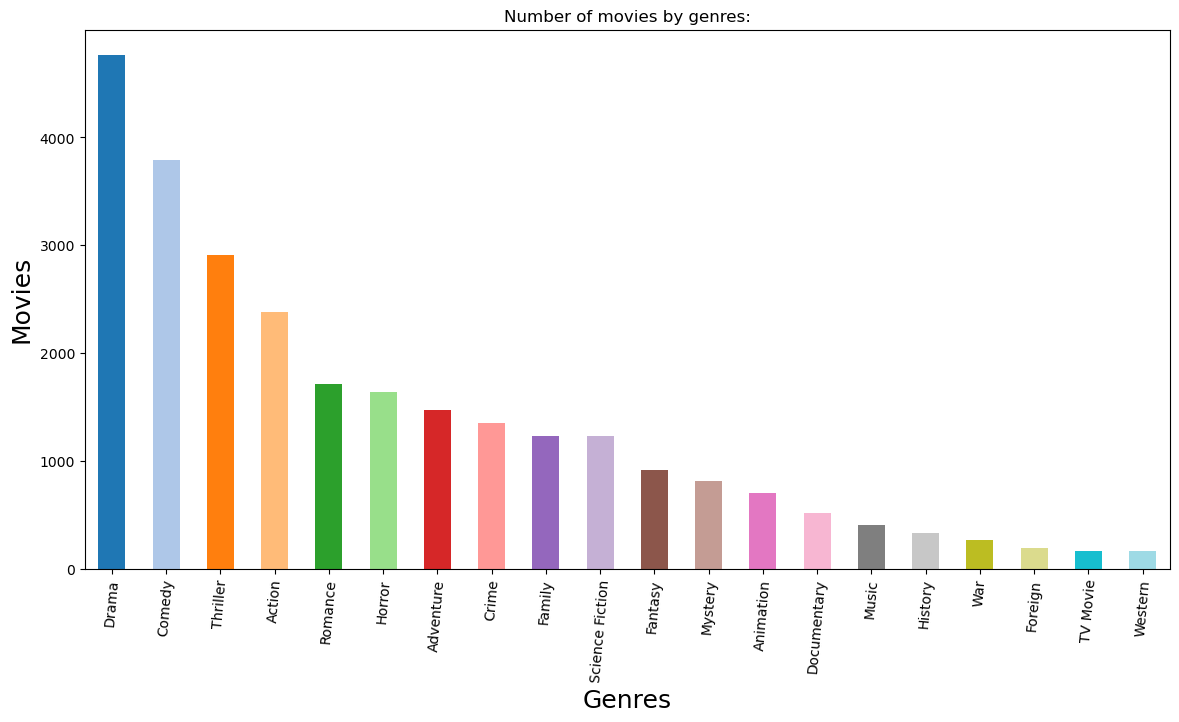

In [27]:
total_genres_new.plot(kind='bar', title='Number of movies by genres:', figsize=(14,7),color=plt.cm.tab20(range(len(top_20_directors))));
plt.xlabel('Genres', fontsize=18);
plt.ylabel('Movies', fontsize=18);
plt.xticks(rotation=85);
plt.show();

Drama, Comedy, Thriller and Action are the most popular among all movie genres.

<b>2. Number of movies for each genres throughtout the preriod of 1960-2015:</b>

Create the dataframe contains the number of movies based on genres of each year:

In [47]:
df_genres_year = df_genres_new.groupby(['release_year','genres']).size().unstack('genres')
df_genres_year

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,8.0,5.0,NaN,8.0,2.0,NaN,13.0,3.0,2.0,1.0,5.0,7.0,1.0,NaN,6.0,3.0,NaN,6.0,2.0,6.0
1961,7.0,6.0,1.0,10.0,2.0,NaN,16.0,5.0,2.0,1.0,3.0,3.0,2.0,1.0,7.0,4.0,NaN,NaN,2.0,3.0
1962,8.0,7.0,NaN,5.0,3.0,NaN,21.0,2.0,1.0,1.0,4.0,5.0,1.0,4.0,5.0,2.0,NaN,7.0,3.0,3.0
1963,4.0,7.0,1.0,13.0,4.0,NaN,13.0,3.0,2.0,2.0,4.0,9.0,NaN,6.0,8.0,2.0,NaN,10.0,1.0,2.0
1964,5.0,5.0,2.0,16.0,10.0,NaN,20.0,4.0,4.0,1.0,3.0,6.0,5.0,4.0,9.0,4.0,NaN,9.0,3.0,1.0
1965,9.0,6.0,1.0,7.0,2.0,NaN,20.0,3.0,NaN,1.0,4.0,5.0,2.0,3.0,5.0,2.0,1.0,11.0,8.0,4.0
1966,14.0,11.0,3.0,16.0,5.0,1.0,16.0,7.0,2.0,2.0,2.0,3.0,NaN,6.0,6.0,6.0,NaN,8.0,4.0,7.0
1967,7.0,7.0,2.0,17.0,7.0,1.0,16.0,3.0,3.0,NaN,NaN,4.0,5.0,3.0,11.0,4.0,NaN,5.0,1.0,2.0
1968,6.0,5.0,3.0,9.0,5.0,NaN,20.0,5.0,5.0,NaN,3.0,4.0,3.0,4.0,6.0,4.0,NaN,5.0,4.0,1.0


The new dataframe of movie count each gerne per year, with each genres is a dataframe's column:

In [29]:
genres_years_pivot_df = pd.pivot_table(df_genres_year, values='count', index='release_year', columns='genres')
genres_years_pivot_df.head(10)

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,8.0,5.0,NaN,8.0,2.0,NaN,13.0,3.0,2.0,1.0,5.0,7.0,1.0,NaN,6.0,3.0,NaN,6.0,2.0,6.0
1961,7.0,6.0,1.0,10.0,2.0,NaN,16.0,5.0,2.0,1.0,3.0,3.0,2.0,1.0,7.0,4.0,NaN,NaN,2.0,3.0
1962,8.0,7.0,NaN,5.0,3.0,NaN,21.0,2.0,1.0,1.0,4.0,5.0,1.0,4.0,5.0,2.0,NaN,7.0,3.0,3.0
1963,4.0,7.0,1.0,13.0,4.0,NaN,13.0,3.0,2.0,2.0,4.0,9.0,NaN,6.0,8.0,2.0,NaN,10.0,1.0,2.0
1964,5.0,5.0,2.0,16.0,10.0,NaN,20.0,4.0,4.0,1.0,3.0,6.0,5.0,4.0,9.0,4.0,NaN,9.0,3.0,1.0
1965,9.0,6.0,1.0,7.0,2.0,NaN,20.0,3.0,NaN,1.0,4.0,5.0,2.0,3.0,5.0,2.0,1.0,11.0,8.0,4.0
1966,14.0,11.0,3.0,16.0,5.0,1.0,16.0,7.0,2.0,2.0,2.0,3.0,NaN,6.0,6.0,6.0,NaN,8.0,4.0,7.0
1967,7.0,7.0,2.0,17.0,7.0,1.0,16.0,3.0,3.0,NaN,NaN,4.0,5.0,3.0,11.0,4.0,NaN,5.0,1.0,2.0
1968,6.0,5.0,3.0,9.0,5.0,NaN,20.0,5.0,5.0,NaN,3.0,4.0,3.0,4.0,6.0,4.0,NaN,5.0,4.0,1.0


Replacing Nulls in the above dataframe with 0s:

In [30]:
genres_years_pivot_df.fillna(0, inplace=True)
genres_years_pivot_df.head()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,8.0,5.0,0.0,8.0,2.0,0.0,13.0,3.0,2.0,1.0,5.0,7.0,1.0,0.0,6.0,3.0,0.0,6.0,2.0,6.0
1961,7.0,6.0,1.0,10.0,2.0,0.0,16.0,5.0,2.0,1.0,3.0,3.0,2.0,1.0,7.0,4.0,0.0,0.0,2.0,3.0
1962,8.0,7.0,0.0,5.0,3.0,0.0,21.0,2.0,1.0,1.0,4.0,5.0,1.0,4.0,5.0,2.0,0.0,7.0,3.0,3.0
1963,4.0,7.0,1.0,13.0,4.0,0.0,13.0,3.0,2.0,2.0,4.0,9.0,0.0,6.0,8.0,2.0,0.0,10.0,1.0,2.0
1964,5.0,5.0,2.0,16.0,10.0,0.0,20.0,4.0,4.0,1.0,3.0,6.0,5.0,4.0,9.0,4.0,0.0,9.0,3.0,1.0


Visualize the Number of movie each genres throught the years using stacked area plot to show the trends of movies Genres:

In [31]:
#Visualize stacked area plot function:
def stackPlot(dataframe,title):
	plt.figure(figsize=(11, 11))
	plt.stackplot(dataframe.index,dataframe.values.T,labels=dataframe.columns);
	plt.legend(loc='upper left')
	plt.title(title)

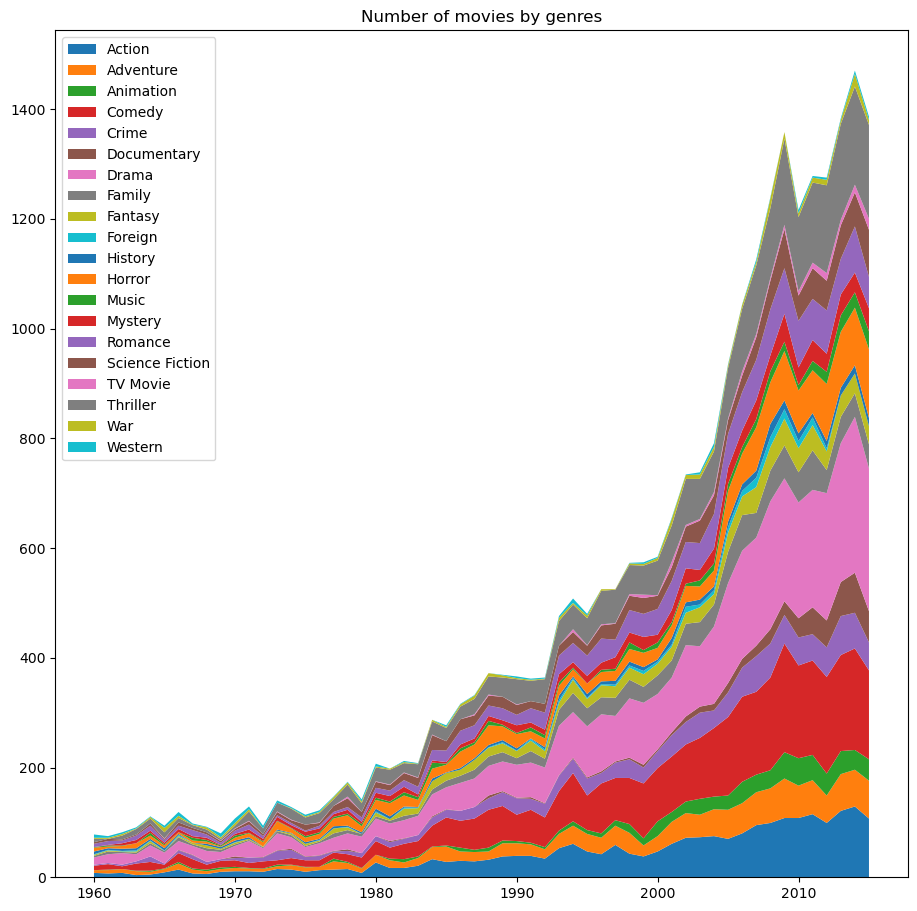

In [32]:
stackPlot(genres_years_pivot_df,title='Number of movies by genres')

Overall, the movie genres show an increasing trend. Drama seems to be the most frequent genre in movies throught the years.<br>
Thriller, Comedy and Action movies show a similar rising pattern.

<b>3. Revenue of each gerne through the year:</b>

A dataframe contains each gerne total revenue by year:

In [33]:
df_genres_new_1 = df_genres_new.loc[df['revenue_adj'] != 0.0] #Dropping movies have no revenue
genres_revenue_df = df_genres_new_1.groupby(['release_year','genres']).agg({'revenue_adj': 'sum'})
genres_revenue_df

revenue_adj
release_year genres                       
1960         Action           4.785425e+08
             Adventure        3.616441e+07
             Comedy           3.546397e+08
             Drama            9.068750e+08
             Family           7.372967e+07
...                                    ...
2015         Romance          1.573139e+09
             Science Fiction  8.847693e+09
             Thriller         7.125091e+09
             War              6.496079e+08
             Western          6.338243e+08

[882 rows x 1 columns]

The dataframe of movie revenue each gerne by year, with each gerne is a column instead:

In [34]:
genres_revenue_pivot_df = pd.pivot_table(genres_revenue_df, values='revenue_adj', index='release_year', columns='genres')
genres_revenue_pivot_df.head()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,4.785425e+08,3.616441e+07,NaN,3.546397e+08,NaN,NaN,9.068750e+08,7.372967e+07,NaN,NaN,4.423780e+08,2.359350e+08,NaN,NaN,2.809101e+08,NaN,NaN,2.359350e+08,NaN,3.616441e+07
1961,2.421894e+08,1.785636e+09,1.574815e+09,1.709770e+09,3.184705e+08,NaN,8.136701e+08,1.603994e+09,NaN,NaN,7.294861e+07,1.458972e+07,3.184705e+08,NaN,6.930118e+07,NaN,NaN,NaN,2.108215e+08,3.136790e+07
1962,7.900460e+08,1.294637e+09,NaN,5.766759e+07,9.464582e+07,NaN,1.009038e+09,5.766759e+07,NaN,NaN,5.045914e+08,9.010561e+06,5.766759e+07,9.010561e+06,NaN,NaN,NaN,4.296236e+08,5.045914e+08,4.180900e+08
1963,6.329752e+08,5.973743e+08,NaN,1.733956e+08,7.745407e+07,NaN,5.179930e+08,NaN,NaN,NaN,5.179930e+08,8.119517e+07,NaN,9.594148e+07,5.071318e+08,NaN,NaN,6.933157e+08,3.560090e+07,NaN
1964,8.780804e+08,8.780804e+08,NaN,8.793584e+08,1.361639e+08,NaN,7.061220e+08,1.225184e+09,7.190046e+08,NaN,NaN,NaN,1.232218e+09,4.921187e+07,5.905425e+08,NaN,NaN,9.272923e+08,6.636764e+07,NaN


Replacing Nulls with 0s in the above dataframe:

In [35]:
genres_revenue_pivot_df.fillna(float(0), inplace=True)
genres_revenue_pivot_df.head()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,4.785425e+08,3.616441e+07,0.000000e+00,3.546397e+08,0.000000e+00,0.0,9.068750e+08,7.372967e+07,0.000000e+00,0.0,4.423780e+08,2.359350e+08,0.000000e+00,0.000000e+00,2.809101e+08,0.0,0.0,2.359350e+08,0.000000e+00,3.616441e+07
1961,2.421894e+08,1.785636e+09,1.574815e+09,1.709770e+09,3.184705e+08,0.0,8.136701e+08,1.603994e+09,0.000000e+00,0.0,7.294861e+07,1.458972e+07,3.184705e+08,0.000000e+00,6.930118e+07,0.0,0.0,0.000000e+00,2.108215e+08,3.136790e+07
1962,7.900460e+08,1.294637e+09,0.000000e+00,5.766759e+07,9.464582e+07,0.0,1.009038e+09,5.766759e+07,0.000000e+00,0.0,5.045914e+08,9.010561e+06,5.766759e+07,9.010561e+06,0.000000e+00,0.0,0.0,4.296236e+08,5.045914e+08,4.180900e+08
1963,6.329752e+08,5.973743e+08,0.000000e+00,1.733956e+08,7.745407e+07,0.0,5.179930e+08,0.000000e+00,0.000000e+00,0.0,5.179930e+08,8.119517e+07,0.000000e+00,9.594148e+07,5.071318e+08,0.0,0.0,6.933157e+08,3.560090e+07,0.000000e+00
1964,8.780804e+08,8.780804e+08,0.000000e+00,8.793584e+08,1.361639e+08,0.0,7.061220e+08,1.225184e+09,7.190046e+08,0.0,0.000000e+00,0.000000e+00,1.232218e+09,4.921187e+07,5.905425e+08,0.0,0.0,9.272923e+08,6.636764e+07,0.000000e+00


Visualize the revenue of each movie genre by year using stacked area plot:

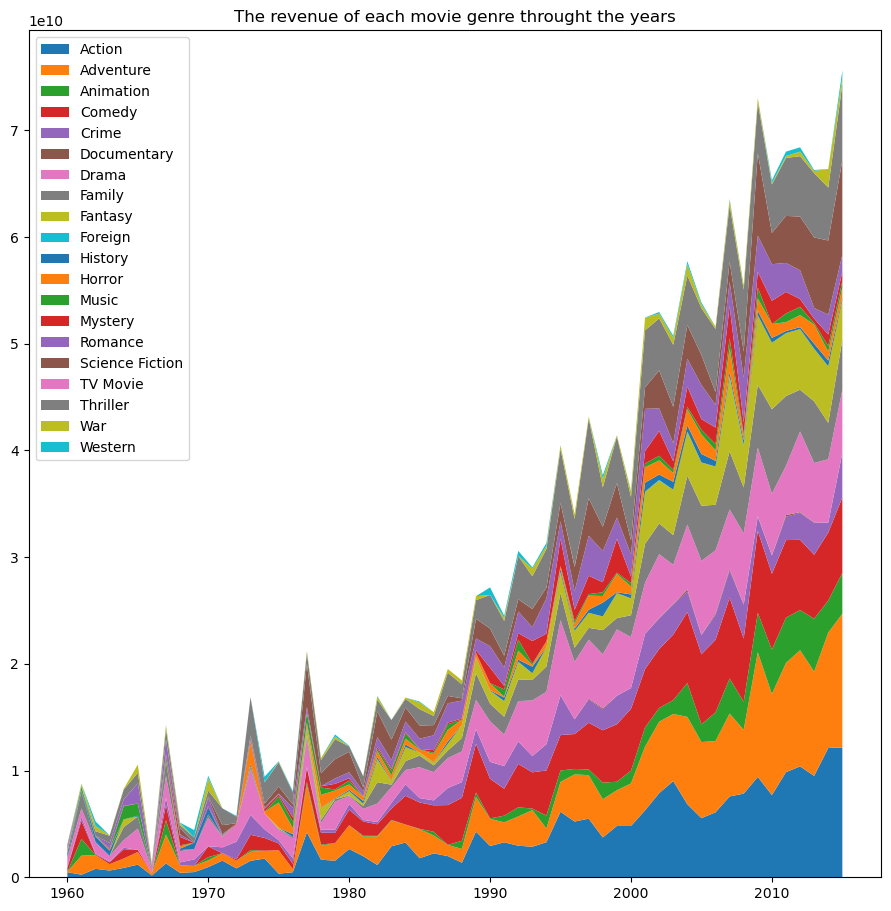

In [36]:
stackPlot(genres_revenue_pivot_df,title='The revenue of each movie genre throught the years')

<b>4. Budget for each gerne through the year:</b>

A dataframe contains each gerne total budget by year:

In [37]:
df_genres_new_2 = df_genres_new.loc[df['budget_adj'] != 0.0] #Dropping movies have no budget
genres_budget_df = df_genres_new_2.groupby(['release_year','genres']).agg({'budget_adj': 'sum'})
genres_budget_df

budget_adj
release_year genres                       
1960         Action           1.032215e+08
             Adventure        2.027566e+07
             Comedy           4.445899e+07
             Drama            1.165441e+08
             Fantasy          5.529726e+06
...                                    ...
2015         Science Fiction  2.255315e+09
             TV Movie         2.759999e+06
             Thriller         1.954125e+09
             War              1.968799e+08
             Western          2.316559e+08

[916 rows x 1 columns]

The dataframe of movie budget each gerne by year, with each gerne is a column instead:

In [38]:
genres_budget_pivot_df = pd.pivot_table(genres_budget_df, values='budget_adj', index='release_year', columns='genres')
genres_budget_pivot_df.head()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,1.032215e+08,2.027566e+07,NaN,4.445899e+07,NaN,NaN,1.165441e+08,NaN,5.529726e+06,NaN,8.847561e+07,9.414896e+06,NaN,NaN,4.976753e+07,7.004319e+06,NaN,1.347003e+07,NaN,1.474593e+07
1961,1.167178e+08,7.294861e+07,2.917944e+07,9.045628e+07,4.376917e+07,NaN,2.402708e+08,5.106403e+07,NaN,NaN,2.188458e+07,1.458972e+06,4.376917e+07,NaN,5.835889e+07,NaN,NaN,NaN,4.376917e+07,4.376917e+07
1962,1.881405e+08,2.241828e+08,NaN,9.082646e+02,1.441690e+07,NaN,3.469436e+08,NaN,9.082646e+02,908.264559,1.802112e+08,6.631773e+05,NaN,1.607484e+07,1.441781e+07,4.469238e+05,NaN,3.085216e+07,1.802112e+08,1.311938e+08
1963,2.057732e+08,1.274512e+08,NaN,1.025306e+08,6.692969e+07,NaN,3.710681e+08,7.120179e+06,7.120179e+06,NaN,3.781883e+08,2.361407e+07,NaN,2.895421e+07,2.571453e+08,5.340135e+06,NaN,8.010202e+07,2.848072e+07,NaN
1964,2.460594e+07,3.011064e+07,NaN,8.295716e+07,1.501075e+07,NaN,1.822116e+08,1.616962e+08,4.218160e+07,NaN,NaN,4.569674e+05,1.652113e+08,1.501075e+07,1.652113e+08,8.436321e+06,NaN,3.961669e+07,1.265448e+07,NaN


Replace the Nulls of the generated dataframe with zeros:

In [39]:
genres_budget_pivot_df.fillna(float(0), inplace=True)
genres_budget_pivot_df.head()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,1.032215e+08,2.027566e+07,0.000000e+00,4.445899e+07,0.000000e+00,0.0,1.165441e+08,0.000000e+00,5.529726e+06,0.000000,8.847561e+07,9.414896e+06,0.000000e+00,0.000000e+00,4.976753e+07,7.004319e+06,0.0,1.347003e+07,0.000000e+00,1.474593e+07
1961,1.167178e+08,7.294861e+07,2.917944e+07,9.045628e+07,4.376917e+07,0.0,2.402708e+08,5.106403e+07,0.000000e+00,0.000000,2.188458e+07,1.458972e+06,4.376917e+07,0.000000e+00,5.835889e+07,0.000000e+00,0.0,0.000000e+00,4.376917e+07,4.376917e+07
1962,1.881405e+08,2.241828e+08,0.000000e+00,9.082646e+02,1.441690e+07,0.0,3.469436e+08,0.000000e+00,9.082646e+02,908.264559,1.802112e+08,6.631773e+05,0.000000e+00,1.607484e+07,1.441781e+07,4.469238e+05,0.0,3.085216e+07,1.802112e+08,1.311938e+08
1963,2.057732e+08,1.274512e+08,0.000000e+00,1.025306e+08,6.692969e+07,0.0,3.710681e+08,7.120179e+06,7.120179e+06,0.000000,3.781883e+08,2.361407e+07,0.000000e+00,2.895421e+07,2.571453e+08,5.340135e+06,0.0,8.010202e+07,2.848072e+07,0.000000e+00
1964,2.460594e+07,3.011064e+07,0.000000e+00,8.295716e+07,1.501075e+07,0.0,1.822116e+08,1.616962e+08,4.218160e+07,0.000000,0.000000e+00,4.569674e+05,1.652113e+08,1.501075e+07,1.652113e+08,8.436321e+06,0.0,3.961669e+07,1.265448e+07,0.000000e+00


Visualize the budget for each movie genre by year using stacked area plot:

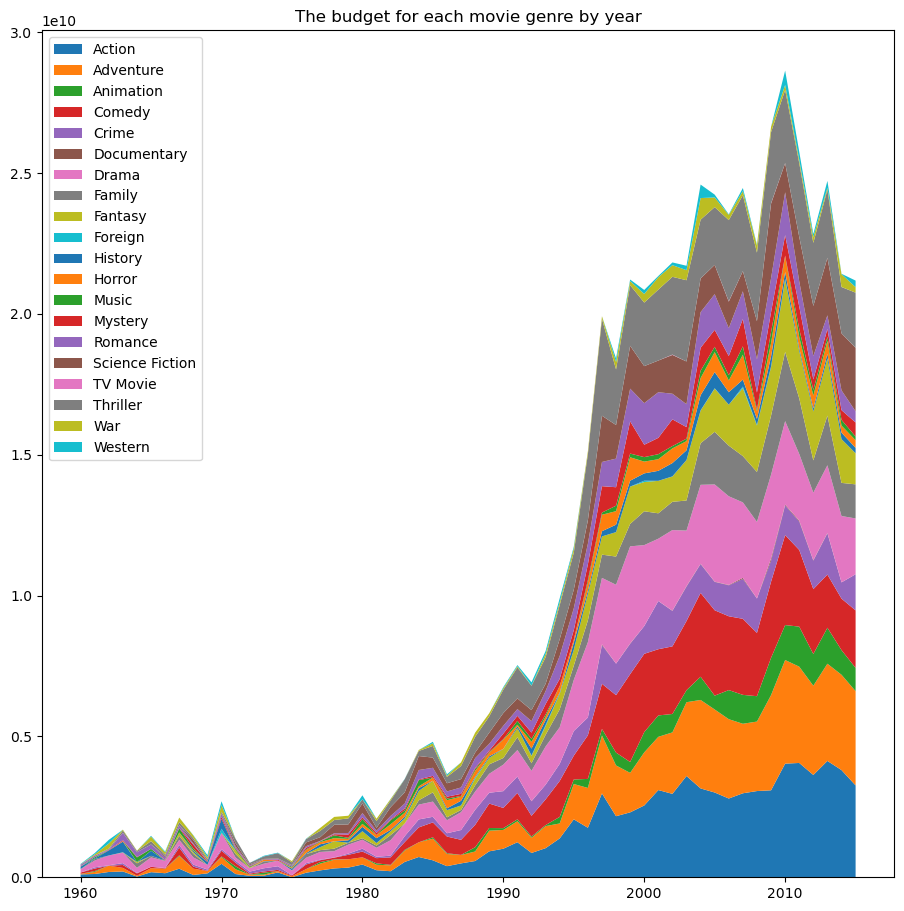

In [40]:
stackPlot(genres_budget_pivot_df,title='The budget for each movie genre by year')

<a id='conclusions'></a>
## Conclusions


This dataset provide detailed information about movies made throught the period of 1960-2015.<br>
<br>
The limitations the dataset:<br>1. Null and zero values in some features. When anylizing the movies' directors/genres - the movies that missing director/genres should be removed. Whereas the some movies don't have data about its revenue/budget (zero budget/revenue).<br>2. When comparing director's works based on their voting score, the directors with the most movies made or have the highest total revenue aren't appear on the top rated directors. Which should be re-considered, since the movies that hold the highest score seems to have a few of total voters comparing to the famous movies (with thoudsands of voters). <br> <br>There are 20 different movie genres. Drama, action, thriller and comedy genres depict the increasing of movies have made, they also hold large proportion of the number of movies. Corresponding is the revenue of those genres are largest, with a remarkable increasing trend. But action, comedy and thriller are by far the top-grossing genres, the budget for those movie gernes also big comparing to other's.<br> Drama, on the other hand, has most number of movies but doesn't required as much as budget as action/thriller block-buster movies.

